# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



# Task 1
For every column in the data:
- a. State whether the values match the description given in the table above.
- b. State the number of missing values in the column.
- c. Describe what you did to make values match the description if they did not match

# Task 1 Answer

product_id: 
- a. The values match the description, has 1500 rows, and has no repeats.
- b. There were 0 missing values.
- c. I did nothing

category:
- a. The values did not match the description as there are 25 rows with '-' as the variable
- b. There were 25 missing values.
- c. I updated 25 '-' values to 'Unknown'.

animal:
- a. The values match the description.
- b. There were 0 missing values.
- c. I did nothing.

size:
- a. The values did not match the descriptions as the capitalization needed standardization.
- b. There were 0 missing values
- c. I used lower() to standardize capitalization as INITCAP() was not working in this SQL environment. I also tried TRIM() but discovered that it was not needed, so I did not include it.

price:
- a. The values did not match the description as there are 150 'unlisted' prices
- b. There were 150 missing values.
- c. I replaced 150 'unlisted' values with the median price, which was 28.07. 

sales:
- a. The values match the description.
- b. There were 0 missing values.
- c. I did nothing.

rating:
- a. The values did not match as there were 150 values marked as 'NA', and '10' was never used as a rating
- b. There wer 150 missing values.
- c. I replaced 150 'NA' values with '0'

repeat_purchase:
- a. the values match the description.
- b. There were 0 missing values.
- c. I did nothing.




In [1]:
--COPY pet_supplies_2212.csv AS NEW TABLE:
CREATE TABLE pet_supplies_copy AS
SELECT * FROM "pet_supplies_2212.csv";

--CATEGORY: Replace '-' with 'Unknown'
UPDATE pet_supplies_copy
SET category = 'Unknown'
WHERE category = '-';

--SIZE:
UPDATE pet_supplies_copy
SET size = lower(size);

--PRICE: 
--1. Check to see all values are numbers/floats
--SELECT price
--FROM pet_supplies_copy
--WHERE price::numeric IS NULL AND price IS NOT NULL;
--discovered there are values 'unlisted'

--2. Replace 'unlisted' values with overall median price
	--2.1 Calculate the median price
	WITH MedianPrice AS (
 	   SELECT ROUND(PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY price::numeric),2) AS median_price
	    FROM pet_supplies_copy
	    WHERE price <> 'unlisted'
	)
	--discovered median price: 28.07

	--2.2 Use the median price in the UPDATE statement
	UPDATE pet_supplies_copy
	SET price = (SELECT median_price FROM MedianPrice)
	WHERE price = 'unlisted';

--RATING:
UPDATE pet_supplies_copy
SET rating = 0
WHERE rating = 'NA';

SELECT *
FROM pet_supplies_copy

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,0001,Food,Bird,large,51.1,1860.62,7,1
1,0002,Housing,Bird,medium,35.98,963.60,6,0
2,0003,Food,Dog,medium,31.23,898.30,5,1
3,0004,Medicine,Cat,small,24.95,982.15,6,1
4,0005,Housing,Cat,small,26.18,832.63,7,1
...,...,...,...,...,...,...,...,...
1495,1496,Food,Bird,medium,40.91,1203.36,5,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5,0
1497,1498,Food,Fish,small,25.79,724.02,3,0
1498,1499,Medicine,Fish,small,19.94,658.66,5,1


# Task 2

Create a visualization that shows how many products are repeat purchases. Use the
visualization to:
- a. State which category of the variable repeat purchases has the most observations
- b. Explain whether the observations are balanced across categories of the variable repeat purchases

# Task 2 Answer:

**a. State which category of the variable repeat purchases has the most observations**
- Equipment is the category of the variable repeat purchases that has the most observations.


**b. Explain whether the observations are balanced across categories of the variable repeat purchases**
- Observations are NOT balanced across categories of the variable repeat purchases. There are seven possible types of categories included in this data. The category with the most rebuys is equipment, by more than 30% compared to medicine, the category with the second highest count of rebuys. The repeated buys are not balanced throughout all seven categories, but housing, food, toys, and medicine have similar counts of repeated buys.

![image-2](image-2.png)


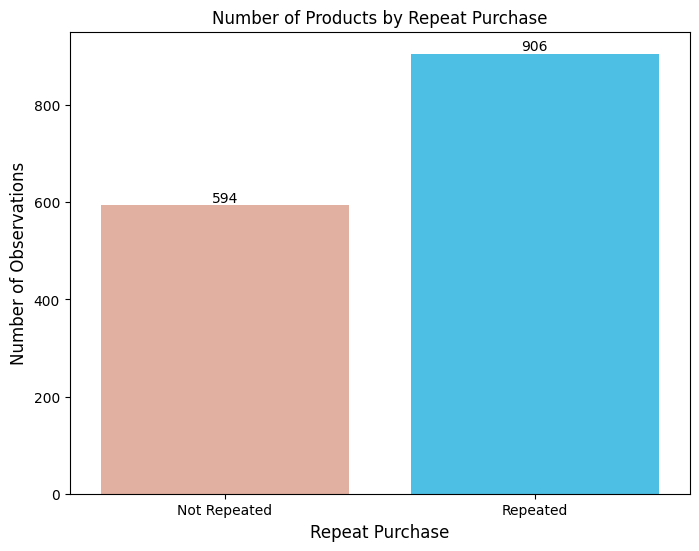

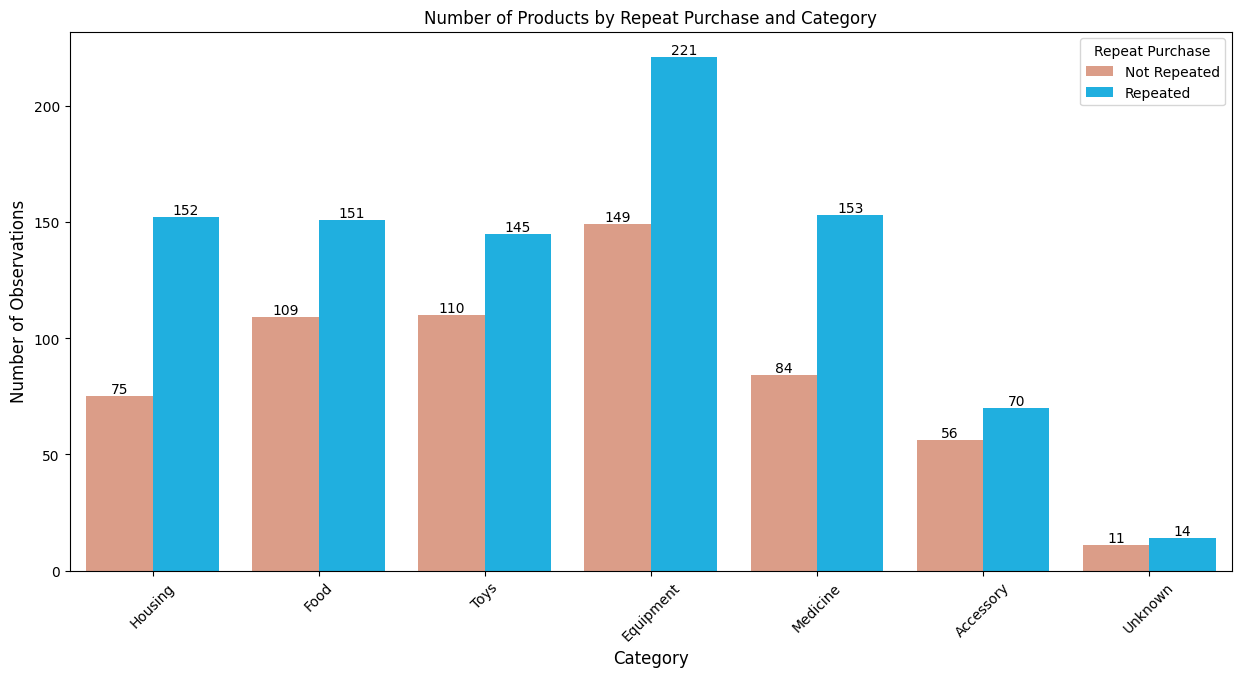

In [14]:
import pandasql as ps
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np 

#retrieve the entire table into a DataFrame
#query = """
#SELECT * FROM df1
#"""

#df1 = ps.sqldf(query, locals())

#BARCHART: REPEAT VS NON-REPEAT
#Compute the repeat_purchase counts 
repeat_purchase_counts = df1['repeat_purchase'].value_counts()

#Plot the data for overall repeat purchases
plt.figure(figsize=(8, 6))
ax1 = sns.barplot(x=repeat_purchase_counts.index, y=repeat_purchase_counts.values, 
                 alpha=0.8, palette={0: "darksalmon", 1: "deepskyblue"})
plt.title('Number of Products by Repeat Purchase')
plt.ylabel('Number of Observations', fontsize=12)
plt.xlabel('Repeat Purchase', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Not Repeated', 'Repeated'])

#Add labels to the bars
for p in ax1.patches:
   ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

#BARCHART: REPEAT VS NON-REPEAT BY CATEGORY 
# Plot the data for repeat purchases broken down by category
plt.figure(figsize=(15, 7))
ax2 = sns.countplot(data=df1, x='category', hue='repeat_purchase', 
                    palette={0: "darksalmon", 1: "deepskyblue"},
                    order=['Housing', 'Food', 'Toys', 'Equipment', 'Medicine', 'Accessory', 'Unknown'])
plt.title('Number of Products by Repeat Purchase and Category')
plt.ylabel('Number of Observations', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.legend(title='Repeat Purchase', loc='upper right', labels=['Not Repeated', 'Repeated'])
plt.xticks(rotation=45)

# Add labels to the bars safely, avoiding NaN heights
for p in ax2.patches:
    height = p.get_height()
    if not np.isnan(height):  # Check if height is not NaN
        ax2.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')


# Task 3
Describe the distribution of all of the sales. Your answer must include a visualization that shows the distribution.

# Task 3 Answer
Looking at all sales distribution, we see that the prince range that has the highest frequency, regardless of it being a repeat purchase or not, lies in the \$950-\$1050 price range. The histogram is also right-skewed, so most sales happen in the lower-mid price range, regardless if its a repeat or non-repeat sale. It is important to note that there are also some outliers around the \$1700 and above price range, so perhaps there are strategies to target the very high end. Overall, repeat purchases also has a much higher frequency than non-repeat purchases, so that is another avenue we can dig deeper into.

### Descriptive Statistics For All Sales Combined:
- Median: 1000.83 
- IQR: 410.74
- 75% Quartile: 1158.16
- 25% Quartile: 747.42 
- Upper Whisker: 1729.76 
- Lower Whisker: 286.94

![image-3](image-3.png)


GRAPHS FOR TASK 3:


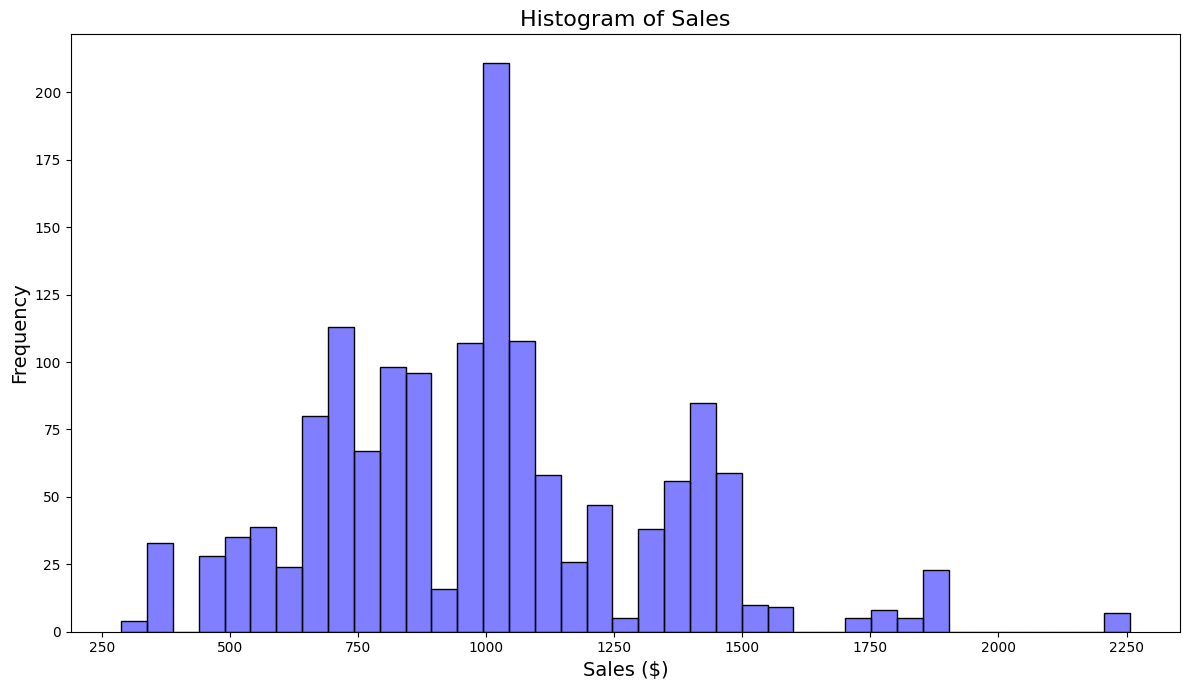

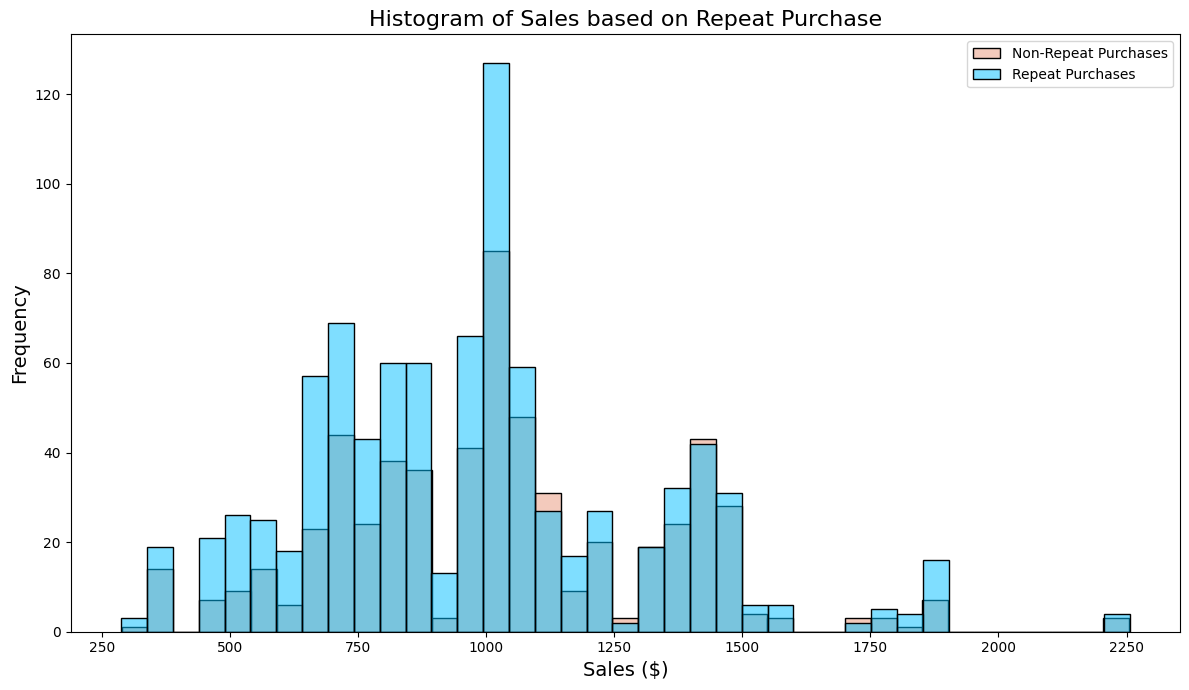

In [10]:
import pandasql as ps
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np 

print('GRAPHS FOR TASK 3:')

##########
# HISTOGRAM: ALL SALES (BINS OF $50)
# Setting up the figure
plt.figure(figsize=(12, 7))

# Drawing the histogram with adjusted bin width
bin_width = 50  # Adjusting the bin width to $50 intervals
bins = int((df1['sales'].max() - df1['sales'].min()) / bin_width)

# Plotting the histogram for all sales data
ax = sns.histplot(df1['sales'], kde=False, bins=bins, color='blue', alpha=0.5)

# Note: We're not separating sales data based on 'repeat_purchase' anymore.

# Setting titles and labels
plt.title('Histogram of Sales', fontsize=16)
plt.xlabel('Sales ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()
##########



##########
# HISTOGRAM: REPEAT VS NON-REPEAT SALES (BINS OF $50)

# Setting up the figure
plt.figure(figsize=(12, 7))

# Drawing the histogram
bin_width = 50  # Adjusting the bin width to $50 intervals
bins = int((df1['sales'].max() - df1['sales'].min()) / bin_width)
colors = ['darksalmon', 'deepskyblue']
labels = ['Non-Repeat Purchases', 'Repeat Purchases']

# Extract sales data for non-repeated and repeated purchases
non_repeat_sales = df1[df1['repeat_purchase'] == 0]['sales']
repeat_sales = df1[df1['repeat_purchase'] == 1]['sales']

for i, sales_data in enumerate([non_repeat_sales, repeat_sales]):
    ax = sns.histplot(sales_data, kde=False, bins=bins, color=colors[i], label=labels[i], alpha=0.5)

# Labeling the bars
# for p in ax.patches:
#     if p.get_height() > 0:  # Only label bars with height > 0 to avoid clutter
#         ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                      ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
#                      textcoords='offset points')

# Setting titles and labels
plt.title('Histogram of Sales based on Repeat Purchase', fontsize=16)
plt.xlabel('Sales ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
##########



##########
# # BOXPLOT: ALL SALES
# # Calculate quartiles
# Q1 = df1['sales'].quantile(0.25)
# Q2 = df1['sales'].quantile(0.5)  # This is also the median
# Q3 = df1['sales'].quantile(0.75)
# IQR = Q3 - Q1

# # Determine the actual data points for the whiskers
# lower_whisker_actual = df1['sales'][df1['sales'] >= lower_whisker_theoretical].min()
# upper_whisker_actual = df1['sales'][df1['sales'] <= upper_whisker_theoretical].max()

# # Create the boxplot
# plt.figure(figsize=(10, 7))
# ax = sns.boxplot(x=df1['sales'], color="lightblue")

# # Add labels for the quartiles and whiskers
# ax.annotate(f'Q1: {Q1:.2f}', xy=(Q1, -0.3), xytext=(Q1, -0.5), 
#            arrowprops=dict(arrowstyle='->'), ha='center')
# ax.annotate(f'Median (Q2): {Q2:.2f}', xy=(Q2, -0.3), xytext=(Q2, -0.7),
#            arrowprops=dict(arrowstyle='->'), ha='center')
# ax.annotate(f'Q3: {Q3:.2f}', xy=(Q3, -0.3), xytext=(Q3, -0.9),
#            arrowprops=dict(arrowstyle='->'), ha='center')
# ax.annotate(f'Lower Whisker: {lower_whisker_actual:.2f}', xy=(lower_whisker_actual, -0.3), xytext=(lower_whisker_actual, -1.1),
#            arrowprops=dict(arrowstyle='->'), ha='center')
# ax.annotate(f'Upper Whisker: {upper_whisker_actual:.2f}', xy=(upper_whisker_actual, -0.3), xytext=(upper_whisker_actual, -1.3),
#            arrowprops=dict(arrowstyle='->'), ha='center')

# plt.title('Distribution of Sales')
# plt.xlabel('Sales')
# plt.show()
##########

# Task 4
Describe the relationship between repeat purchases and sales. Your answer must include a visualization to demonstrate the relationship

# Task 4 Answer

## Descriptive Statistics:
**For Repeat Purchases:**
- Median: 978.21 
- IQR: 373.55
- 75% Quartile: 1112.0075 
- 25% Quartile: 738.45
- Upper Whisker: 1567.31 
- Lower Whisker: 286.94

**For Non-Repeat Purchases:**
- Median: 1030.185 
- IQR: 413.1474999999999 
- 75% Quartile: 1208.8925 
- 25% Quartile: 795.745 
- Upper Whisker: 1795.37 
- Lower Whisker: 288.01 

![image-4](image-4.png)

## Analysis:
- To understand the relationship between repeat purchases and sales, a boxplot is chosen as it provides a visual summary of the central location, spread, and shape (distribution) of a dataset, along with potential outliers.
- Products with repeat purchases have a slightly lower median sales value but a more evenly distributed range of sales values. Conversely, products without repeat purchases have a slightly higher median but a more clustered distribution around this median.
- The median sales value (central tendency) for products with repeat purchases is slightly lower at \$978.21, compared to products without repeat purchases, which sits at  \$1030.19. In terms of spread, products with repeat purchases display a broader interquartile range (IQR) that spans 373.55. In contrast, sales of non-repeated products have a braoder IQR of 413.15. This suggests that sales values for products with non-repeat purchases are more evenly distributed, as evidenced by the wider IQR. 
- Furthermore, the boxplot reveals outliers for both groups. Products without repeat purchases exhibit several outliers with notably higher sales values. Products with non-repeat purchases also show outliers, albeit fewer in comparison. 


## Business Insights:
- **Popular Everyday Products:** The fact that products with repeat purchases have a median sales value slightly lower than non-repeat products suggests that these products are more frequently bought but might be of lower value. This aligns with the idea of everyday products that customers need regularly.
- **High-Value Outliers:** The outliers in sales for both repeat and non-repeat purchase products could be indicative of either premium products or products that have been particularly popular during specific promotional periods and/or seasonal trends.
- **Consistent Sales for Repeat Products:** The broader spread of sales values for products with repeat purchases indicates that there's a consistent and reliable consumer base for these products. This could mean there is a loyal customer segment that regularly shops for these items.

## Recommendations:
- **Promote Repeat Purchase Products:** Given the consistent sales and loyal customer base for products with repeat purchases, PetMind could amplify promotions around these products. This could include loyalty programs, subscription models, or bundle deals to increase the average transaction value.
- **Study High-Value Outliers:** Investigate the specific products that fall into the outlier category for sales. Understand what drives their high sales—whether it's product quality, marketing efforts, or seasonal trends—and see if similar strategies can be applied to other products.
- **Diversify Product Offerings:** Considering the narrower IQR for repeat purchase products, it might be beneficial to diversify product offerings in this category. Introducing new products or variations might entice more customers and widen the sales distribution.
- **Engage Feedback Loop:** Given the significant number of repeat purchases, it would be advantageous to set up a feedback mechanism. Understanding why customers repeatedly buy certain products can offer insights into product improvements, potential new product lines, or marketing strategies.
- **Leverage Data for Forecasting:** The sales patterns observed, especially the consistent sales for repeat purchase products, can be used for inventory management and sales forecasting. This would ensure optimal stock levels and reduce the risk of stockouts or overstocking.



GRAPHS FOR TASK 4:


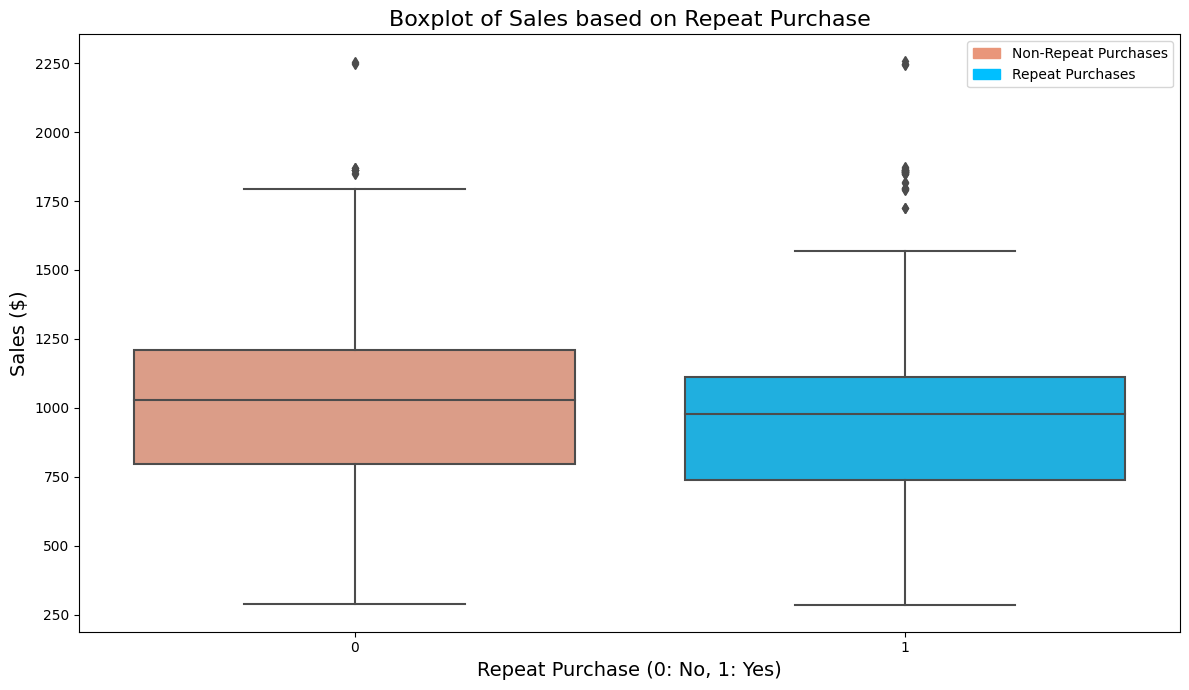

In [11]:
print('GRAPHS FOR TASK 4:')

##########
#HEXBIN
#plt.figure(figsize=(14, 7))

# Data for repeat purchases
# repeat_sales = df1[df1['repeat_purchase'] == 1]['sales']
# non_repeat_sales = df1[df1['repeat_purchase'] == 0]['sales']

# Hexbin for repeat purchases
# plt.subplot(1, 2, 1)
# hb1 = plt.hexbin(range(len(repeat_sales)), repeat_sales, gridsize=50, cmap='Blues')
# cb1 = plt.colorbar(hb1)
# cb1.set_label('Count')
# plt.title('Hexbin of Repeat Purchases Sales', fontsize=16)
# plt.xlabel('Data Points', fontsize=14)
# plt.ylabel('Sales ($)', fontsize=14)

# # Hexbin for non-repeat purchases
# plt.subplot(1, 2, 2)
# hb2 = plt.hexbin(range(len(non_repeat_sales)), non_repeat_sales, gridsize=50, cmap='Reds')
# cb2 = plt.colorbar(hb2)
# cb2.set_label('Count')
# plt.title('Hexbin of Non-Repeat Purchases Sales', fontsize=16)
# plt.xlabel('Data Points', fontsize=14)
# plt.ylabel('Sales ($)', fontsize=14)

# plt.tight_layout()
# plt.show()
##########

##########
#BOXPLOT WITH OUTLIERS
# Setting the style and size
plt.figure(figsize=(12, 7))

# Defining the colors to be used in the plots
colors = ['darksalmon', 'deepskyblue']

# Creating the box plot for sales based on repeat purchase with specified colors
ax = sns.boxplot(x='repeat_purchase', y='sales', data=df1, palette=colors)

# Setting title & labels
plt.title('Boxplot of Sales based on Repeat Purchase', fontsize=16)
plt.xlabel('Repeat Purchase (0: No, 1: Yes)', fontsize=14)
plt.ylabel('Sales ($)', fontsize=14)

# Creating custom legend
legend_elements = [mpatches.Patch(color='darksalmon', label='Non-Repeat Purchases'),
                   mpatches.Patch(color='deepskyblue', label='Repeat Purchases')]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()
##########





In [13]:
print('CALCULATING DESCRIPTIVE STATISTICS:')

##########
# NUMBERS FOR ALL SALES
# Calculate quartiles
Q1 = df1['sales'].quantile(0.25)
Q2 = df1['sales'].quantile(0.5)  # This is also the median
Q3 = df1['sales'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the "theoretical" whiskers
lower_whisker_theoretical = Q1 - 1.5 * IQR
upper_whisker_theoretical = Q3 + 1.5 * IQR


# Determine the actual data points for the whiskers
lower_whisker_actual = df1['sales'][df1['sales'] >= lower_whisker_theoretical].min()
upper_whisker_actual = df1['sales'][df1['sales'] <= upper_whisker_theoretical].max()

# Print statistics
print("For All Sales Combined:",
      "\nMedian:", Q2,
      "\nIQR:", IQR,
      "\n75% Quartile:", Q3,
      "\n25% Quartile:", Q1,
      "\nUpper Whisker:", upper_whisker_actual,
      "\nLower Whisker:", lower_whisker_actual
)
##########



##########
# NUMBERS FOR REPEAT VS NON-REPEAT
# Extract sales data for non-repeated and repeated purchases
non_repeat_sales = df1[df1['repeat_purchase'] == 0]['sales']
repeat_sales = df1[df1['repeat_purchase'] == 1]['sales']

# Median sales for both groups
repeat_median = repeat_sales.median()
non_repeat_median = non_repeat_sales.median()

# IQR calculations for both groups
repeat_iqr = repeat_sales.quantile(0.75) - repeat_sales.quantile(0.25)
non_repeat_iqr = non_repeat_sales.quantile(0.75) - non_repeat_sales.quantile(0.25)

# Calculate whisker positions for both repeat and non-repeat purchases
repeat_q1 = repeat_sales.quantile(0.25)
repeat_q3 = repeat_sales.quantile(0.75)
repeat_lower_whisker_actual = repeat_sales[repeat_sales >= (repeat_q1 - 1.5 * repeat_iqr)].min()
repeat_upper_whisker_actual = repeat_sales[repeat_sales <= (repeat_q3 + 1.5 * repeat_iqr)].max()

non_repeat_q1 = non_repeat_sales.quantile(0.25)
non_repeat_q3 = non_repeat_sales.quantile(0.75)
non_repeat_lower_whisker_actual = non_repeat_sales[non_repeat_sales >= (non_repeat_q1 - 1.5 * non_repeat_iqr)].min()
non_repeat_upper_whisker_actual = non_repeat_sales[non_repeat_sales <= (non_repeat_q3 + 1.5 * non_repeat_iqr)].max()

# Print combined statistics
print("\nFor Non-Repeat Purchases:",
      "\nMedian:", non_repeat_median,
      "\nIQR:", non_repeat_iqr,
      "\nQ 0.25:", non_repeat_q1,
      "\nQ 0.75:", non_repeat_q3, 
      "\nUpper Whisker:", non_repeat_upper_whisker_actual,
      "\nLower Whisker:", non_repeat_lower_whisker_actual,
      "\n\nFor Repeat Purchases:",
      "\nMedian:", repeat_median,
      "\nIQR:", repeat_iqr,
      "\nQ 0.25:", repeat_q1,
      "\nQ 0.75:", repeat_q3,
      "\nUpper Whisker:", repeat_upper_whisker_actual,
      "\nLower Whisker:", repeat_lower_whisker_actual)
##########




CALCULATING DESCRIPTIVE STATISTICS:
For All Sales Combined: 
Median: 1000.8299999999999 
IQR: 410.73750000000007 
75% Quartile: 1158.1575 
25% Quartile: 747.42 
Upper Whisker: 1729.76 
Lower Whisker: 286.94

For Non-Repeat Purchases: 
Median: 1030.185 
IQR: 413.1474999999999 
Q 0.25: 795.745 
Q 0.75: 1208.8925 
Upper Whisker: 1795.37 
Lower Whisker: 288.01 

For Repeat Purchases: 
Median: 978.21 
IQR: 373.55499999999984 
Q 0.25: 738.4525000000001 
Q 0.75: 1112.0075 
Upper Whisker: 1567.31 
Lower Whisker: 286.94


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam